## TP8 &ndash; Fonctions génératrices

Indiquez vos noms ici:

- $ m_1 $ CLARY Emilie
- $ m_2 $ DIEU Joachim

On peut travailler dans Sage avec des séries de puissances aussi aisément qu'avec des polynômes; il suffit de déclarer notre envie de le faire.

In [1]:
R.<x> = PowerSeriesRing(QQ)  # anneau des séries entières à coefficients rationnels

In [2]:
type(x)

<class 'sage.rings.power_series_poly.PowerSeries_poly'>

Dans les faits, on ne travaille jamais avec tous les termes d'une série mais plutôt avec sa troncature à un ordre donné (20 par défaut):

In [3]:
1/(1+x)

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

mais on peut changer celui-ci à la baisse si on le souhaite:

In [4]:
1/(1+x) + O(x^5)

1 - x + x^2 - x^3 + x^4 + O(x^5)

ou encore à la hausse (mais pour cela il faut augmenter la précision au niveau de l'anneau).

In [5]:
1/(1+x) + O(x^30)  # ne fait pas ce qu'on pourrait croire

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + O(x^20)

In [6]:
R.<x> = PowerSeriesRing(QQ,30)

In [7]:
1/(1+x)  # ok

1 - x + x^2 - x^3 + x^4 - x^5 + x^6 - x^7 + x^8 - x^9 + x^10 - x^11 + x^12 - x^13 + x^14 - x^15 + x^16 - x^17 + x^18 - x^19 + x^20 - x^21 + x^22 - x^23 + x^24 - x^25 + x^26 - x^27 + x^28 - x^29 + O(x^30)

On peut effectuer toutes les opérations arithmétiques de base sur ces séries; et on peut passer d'une liste de coefficients à une série et vice-versa de la façon suivante.

In [8]:
f = R([1,2,3,4,5]); f

1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4

In [9]:
f.prec()

+Infinity

Notez que la série considérée à l'instant n'est __pas__ tout à fait la transformée en $z$ de la suite $(1,2,3,4,5,0,0,\ldots)$: pour cela il faudrait plutôt poser $x = 1/z$ et utiliser $z$ comme variable.

Étant donné une suite $(a_n)_{n\in\mathbb{N}}$, on appelle $\displaystyle f(x) = \sum_{n=0}^\infty a_n x^n$ la __fonction génératrice__ de la suite (sans trop se soucier ici des questions de convergence). Sa transformée en $z$ est $f(z^{-1})$ qui a de bonnes propriétés théoriques; pour le calcul numérique (comme ici) il est souvent plus simple de travailler directement avec $f(x)$.

Voici par exemple la fonction génératrice d'une suite célèbre:

In [10]:
R.<x> = PowerSeriesRing(QQ)

F = 1/(1 - x - x^2)  # z^2/(z^2 - z - 1)

F

1 + x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + 89*x^10 + 144*x^11 + 233*x^12 + 377*x^13 + 610*x^14 + 987*x^15 + 1597*x^16 + 2584*x^17 + 4181*x^18 + 6765*x^19 + O(x^20)

La reconnaissez-vous ?

## A) Partages

À la maison j'ai 42 biscuits et deux garçons: le grand les mange par paquets de 3 et le petit par paquets de 2. De combien de façons peut-on répartir les 42 biscuits entre eux ?

Si on formalise la question, il s'agit de compter le nombre de façons d'écrire $42 = 2 a + 3 b$, soit $x^{42} = (x^2)^a (x^3)^b$. Il s'agit donc du coefficient de $x^{42}$ dans l'expression

$$ (1 + x^2 + x^4 + x^6 + \cdots)(1 + x^3 + x^6 + x^9 + \cdots) = \sum_{a = 0}^\infty (x^2)^a \cdot \sum_{b = 0}^\infty (x^3)^b = \frac{1}{1 - x^2} \cdot \frac{1}{1 - x^3}. $$

In [11]:
R.<x> = PowerSeriesRing(QQ,50)

( 1/(1-x^2) * 1/(1-x^3) ).padded_list()[42]

8

Il y a donc 8 façons de répartir les biscuits en tas de 2 ou 3 ; vérifions en énumérant les couples $(a,b)$ possibles :

In [12]:
for a in range(22):
    if (42 - 2*a) % 3 == 0:
        b = (42 - 2*a) / 3
        print (a,b)

0 14
3 12
6 10
9 8
12 6
15 4
18 2
21 0


Ce qui est bien, c'est que la méthode utilisant les séries génératrices se généralise aisément: le nombre de façons de répartir $n$ objets en $k$ tas par paquets de tailles respectives $m_1, \ldots, m_k$ est le coefficient de $x^n$ dans la fonction génératrice

$$ \prod_{i = 1}^k \frac{1}{1 - x^{m_i}}. $$

En d'autres termes: le coefficient de $x^n$ dans cette expression est le nombre de $k$-uplets $(a_1, \ldots, a_k)$ pour lesquels $\sum_{i=1}^k m_i a_i = n$.

__Question 1__. En utilisant cette méthode, déterminer le nombres de façons de répartir $10$ biscuits entre $2$ enfants (par paquets de $1$):

a) si on suppose qu'on les distribue tous ;

b) si on se permet d'en manger quelques-uns (ce qui rajoute un troisième tas au partage).

Les réponses vous semblent-elles cohérentes ? (comparez à la façon dont vous traiteriez cette question en TD).

#### Combien de façon de répartir 10 biscuits entre 2 personnes ?

Admettons qu'on en donne un nombre b (forcément compris entre 0 et 10) à la personne A. Il en reste donc (10-b) pour la personne B.

On fait donc 2 "tas" de b et b-10 biscuits.

In [13]:
#Question a)

reset()

R.<x> = PowerSeriesRing(QQ,50)

print("Si on les ditribue tous aux 2 enfants, on a",(1/(1-x) * 1/(1-x)).padded_list()[10],"répartitions possibles.")

Si on les ditribue tous aux 2 enfants, on a 11 répartitions possibles.


Pour répartir 10 biscuits entre trois personnes, on rajoute donc une personne C :

In [14]:
#Question b)
reset()

R.<x> = PowerSeriesRing(QQ,50)

print("Si on les distribue pas tous aux 2 enfants, on a",(1/(1-x) * 1/(1-x) * 1/(1-x)).padded_list()[10], "répartitions possibles.")

Si on les distribue pas tous aux 2 enfants, on a 66 répartitions possibles.


On utilise donc des séparateurs, on étale les biscuits puis on met 2 séparateurs pour réaliser 3 "tas".

On a donc les 10 biscuits + les 2 séparateurs, cela fait 12 "cases" au total.

In [15]:
print("|_| |_| |_| |_| |_| |_| |_| |_| |_| |_| |_| |_|")

|_| |_| |_| |_| |_| |_| |_| |_| |_| |_| |_| |_|


On réalise donc la distribution (1 exemple) :

In [16]:
print("|B| |B| |S| |B| |B| |B| |B| |S| |B| |B| |B| |B|")

|B| |B| |S| |B| |B| |B| |B| |S| |B| |B| |B| |B|


On peut relier ça à la fonction binomiale car :

$\frac{1}{1-x}*\frac{1}{1-x}*\frac{1}{1-x} = \frac{1}{(1-x)^p} = \sum_{n=0}^\infty \binom{n+p}{p}x^n$


Avec n le nombre de biscuits et p le nombre de séparateurs, on a :

$\binom{n+p}{p} = \binom{n+p}{(n+p)-p}=\binom{n+p}{n}$

In [17]:
reset()

binomial(12, 2)

66

On voit bien qu'on retrouve le même résultat pour le binomiale de 2

__Question 2__. De combien de façons peut-on rendre 1,47 € en monnaie ?

Il faut d'abord définir les pièces de monnaie et les billets.

In [35]:
reset()

R.<x> = PowerSeriesRing(QQ,200)

piece1 =  1/(1-x)    # 1 centime
piece2 = 1/(1-x^2)     # 2 centimes
billet5 = 1/(1-x^5)     # 5 centimes
billet10 = 1/(1-x^10)   # 10 centimes
billet20 = 1/(1-x^20)   # 20 centimes
billet50 = 1/(1-x^50)   # 50 centimes
billet100 = 1/(1-x^100) # 1 euro

print("On a",( piece1 * piece2 * billet5 * billet10 * billet20 * billet50 * billet100).padded_list()[147], "façons de rendre 1€47 en monnaie.")

On a 20116 façons de rendre 1€47 en monnaie.


__Question 3__. De combien de façons peut-on écrire $20$ comme la somme d'entiers strictement positifs ? Distinguer selon que l'on tienne compte de l'ordre des termes ou pas en prenant soin d'expliquer votre démarche.

On commence sans tenir compte de l'ordre des termes :

In [19]:
reset()
R.<x> = PowerSeriesRing(QQ,200)

produit = 1

for i in range (1,21) :
    produit *= 1/(1 - x^i)
    
print("Sans tenir compte de l'ordre, on a", produit.padded_list()[20], "possibilités d'écriture.")

Sans tenir compte de l'ordre, on a 627 possibilités d'écriture.


On fait maintenant en tenant compte de l'ordre :

In [20]:
reset()
R.<x> = PowerSeriesRing(QQ,200)

somme = 0

for i in range (1,21) :
    somme += (x/(1 - x))^i
    
print("En tenant compte de l'ordre, on a", somme.padded_list()[20], "possibilités d'écriture.")

En tenant compte de l'ordre, on a 524288 possibilités d'écriture.


## B) Parenthésages balancés

On appelle _mot de Dyck_ toute chaîne de caractères ne comportant que des ( et des ) et représentant une expression bien balancée (toute parenthèse ouvrante finira par se refermer un peu plus loin ; et on ne peut pas refermer une paire de parenthèses avant de l'avoir ouverte).

__Question 1__. Écrire une fonction récursive __dyck($n$)__ renvoyant la liste de tous les mots de Dyck de longueur $2n$ (donc comportant $n$ paires de parenthèses). Donner la liste des 42 mots de Dyck de longueur 10.

### Fonction prise à un autre binôme de la classe afin de pouvoir continuer l'exercice.

In [33]:
reset()

# on considère qu'un mot de dyck est toujours divisible en deux : partie de gauche + partie de droite

def dyck(n):
    if (n <= 0):         # premier cas particulier
        return ['']
    
    motsDyck = []
    if (n >= 1):
        for i in range(n):              
            partieG = copy(dyck(i))     
            partieD = copy(dyck(n-1 - i))                 
            for elementG in partieG :
                for elementD in partieD:
                   motsDyck.append('(' + elementG + ')' + elementD) 
                    
    return motsDyck

print("Liste des 42 mots de longueur 10.")

dyck(5)


Liste des 42 mots de longueur 10.


['()()()()()',
 '()()()(())',
 '()()(())()',
 '()()(()())',
 '()()((()))',
 '()(())()()',
 '()(())(())',
 '()(()())()',
 '()((()))()',
 '()(()()())',
 '()(()(()))',
 '()((())())',
 '()((()()))',
 '()(((())))',
 '(())()()()',
 '(())()(())',
 '(())(())()',
 '(())(()())',
 '(())((()))',
 '(()())()()',
 '(()())(())',
 '((()))()()',
 '((()))(())',
 '(()()())()',
 '(()(()))()',
 '((())())()',
 '((()()))()',
 '(((())))()',
 '(()()()())',
 '(()()(()))',
 '(()(())())',
 '(()(()()))',
 '(()((())))',
 '((())()())',
 '((())(()))',
 '((()())())',
 '(((()))())',
 '((()()()))',
 '((()(())))',
 '(((())()))',
 '(((()())))',
 '((((()))))']

__Question 2__. La longueur $C_n$ de la liste renvoyée par __dyck($n$)__ satisfait l'équation de récurrence

$$ C_{n+1} = \sum_{k=0}^n C_k C_{n-k}. $$

a) Vérifier que c'est bien le cas pour $n \leq 10$ en utilisant votre fonction de la question précédente.

b) Utiliser cette récurrence pour obtenir les valeurs de $C_n$ pour $n \in [\![ 0, 100 ] \! ]$ afin d'observer graphiquement l'allure des premiers termes de la suite.

In [34]:
#a)

dyck(5)

['()()()()()',
 '()()()(())',
 '()()(())()',
 '()()(()())',
 '()()((()))',
 '()(())()()',
 '()(())(())',
 '()(()())()',
 '()((()))()',
 '()(()()())',
 '()(()(()))',
 '()((())())',
 '()((()()))',
 '()(((())))',
 '(())()()()',
 '(())()(())',
 '(())(())()',
 '(())(()())',
 '(())((()))',
 '(()())()()',
 '(()())(())',
 '((()))()()',
 '((()))(())',
 '(()()())()',
 '(()(()))()',
 '((())())()',
 '((()()))()',
 '(((())))()',
 '(()()()())',
 '(()()(()))',
 '(()(())())',
 '(()(()()))',
 '(()((())))',
 '((())()())',
 '((())(()))',
 '((()())())',
 '(((()))())',
 '((()()()))',
 '((()(())))',
 '(((())()))',
 '(((()())))',
 '((((()))))']

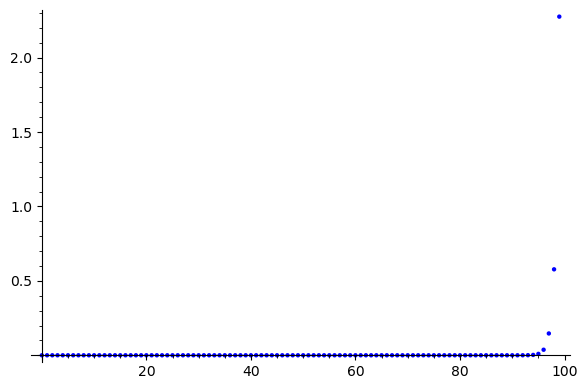

In [36]:
#b)

def Cn(n):
    C2 = []
    
    for a in range(n):
        if (a <= 0):
            somme = 1
            
        else:
            somme = 0
            for k in range(a):
                somme += C2[k] * C2[a - k - 1]
        C2.append(somme)
    return C2

list_plot(Cn(100), color='blue')

__Question 3__. Confirmer vos valeurs trouvées à la question précédente avec les 101 premiers coefficients de la fonction génératrice

$$ C(x) = \sum_{n=0}^\infty C_n x^n = \frac{1 - \sqrt{1 - 4x}}{2x}. $$

In [30]:
R.<x> = PowerSeriesRing(QQ, 100)

print("Valeurs de Cn pour n appartenant de 0 à 100 inclus :")
((1 - sqrt(1 - 4*x)) / (2*x)).padded_list()

Valeurs de Cn pour n appartenant de 0 à 100 inclus :


[1,
 1,
 2,
 5,
 14,
 42,
 132,
 429,
 1430,
 4862,
 16796,
 58786,
 208012,
 742900,
 2674440,
 9694845,
 35357670,
 129644790,
 477638700,
 1767263190,
 6564120420,
 24466267020,
 91482563640,
 343059613650,
 1289904147324,
 4861946401452,
 18367353072152,
 69533550916004,
 263747951750360,
 1002242216651368,
 3814986502092304,
 14544636039226909,
 55534064877048198,
 212336130412243110,
 812944042149730764,
 3116285494907301262,
 11959798385860453492,
 45950804324621742364,
 176733862787006701400,
 680425371729975800390,
 2622127042276492108820,
 10113918591637898134020,
 39044429911904443959240,
 150853479205085351660700,
 583300119592996693088040,
 2257117854077248073253720,
 8740328711533173390046320,
 33868773757191046886429490,
 131327898242169365477991900,
 509552245179617138054608572,
 1978261657756160653623774456,
 7684785670514316385230816156,
 29869166945772625950142417512,
 116157871455782434250553845880,
 451959718027953471447609509424,
 1759414616608818870992479875972,
